<a href="https://colab.research.google.com/github/Varshini-svnit/ML_LABS/blob/main/ML_Lab_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('advertising.csv')

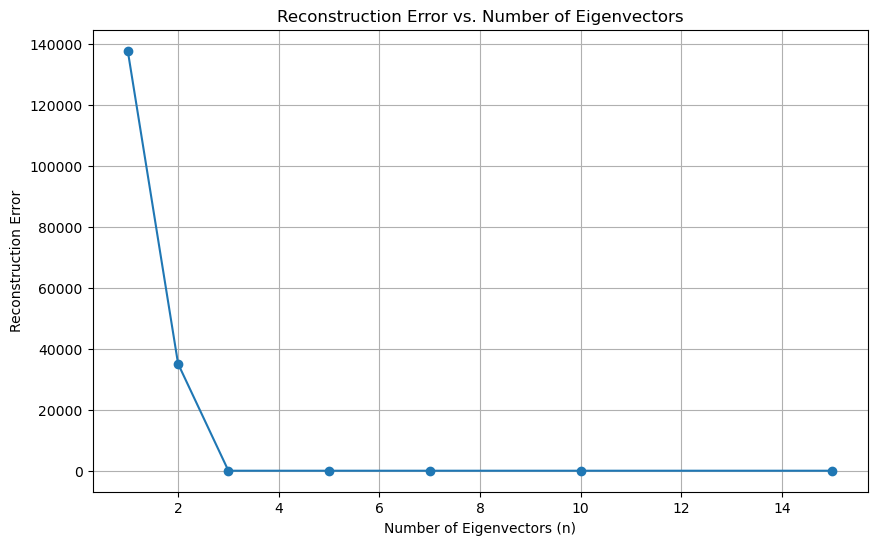

In [ ]:
X = df.drop('Sales', axis=1).values

mu = np.mean(X, axis=0)
A = X - mu

cov_matrix = np.cov(A.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

n_values = [1, 2, 3, 5, 7, 10, 15]
reconstruction_errors = []

for n in n_values:
    top_n_eigenvectors = sorted_eigenvectors[:, :n]

    wj = A @ top_n_eigenvectors

    li = wj @ top_n_eigenvectors.T
    ri = li + mu

    error = np.sum((X - ri) ** 2)
    reconstruction_errors.append(error)

plt.figure(figsize=(10, 6))
plt.plot(n_values, reconstruction_errors, marker='o')
plt.xlabel('Number of Eigenvectors (n)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Eigenvectors')
plt.grid(True)
plt.show()

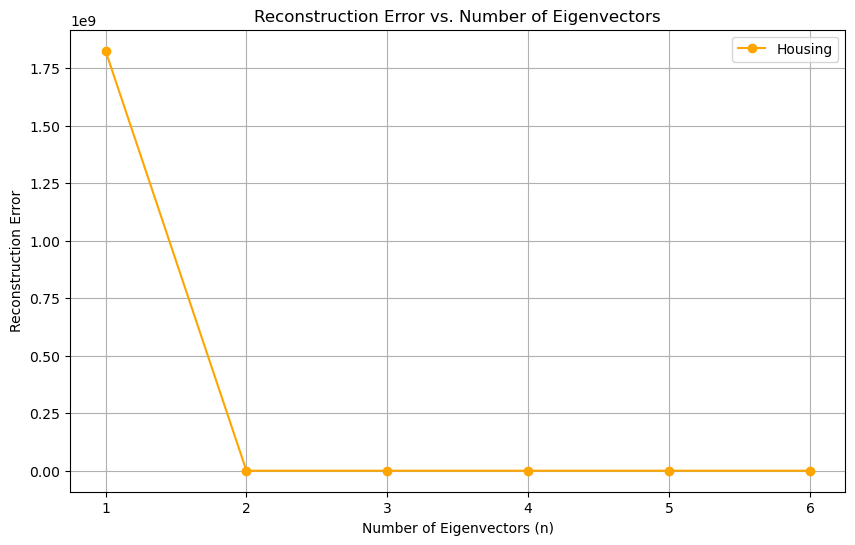

In [ ]:
def run_pca_and_plot(dataset_name, file_path, color="blue"):
    df = pd.read_csv(file_path)

    df = df.select_dtypes(include=[np.number])

    df = df.dropna(axis=1, how="all")
    df = df.loc[:, df.std() > 0]

    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    if df.shape[1] == 0:
        print(f"[WARN] {dataset_name} has no usable numeric features after cleaning.")
        return

    X = df.values
    mu = np.mean(X, axis=0)
    A = X - mu

    cov_matrix = np.cov(A.T)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    n_values = list(range(1, X.shape[1] + 1))
    reconstruction_errors = []

    for n in n_values:
        top_n_eigenvectors = sorted_eigenvectors[:, :n]
        wj = A @ top_n_eigenvectors
        li = wj @ top_n_eigenvectors.T
        ri = li + mu
        error = np.sum((X - ri) ** 2)
        reconstruction_errors.append(error)

    plt.plot(n_values, reconstruction_errors, marker='o', color=color, label=dataset_name)

plt.figure(figsize=(10, 6))

run_pca_and_plot("Housing", "Housing.csv", color="orange")

plt.xlabel("Number of Eigenvectors (n)")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error vs. Number of Eigenvectors")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def simple_gradient_descent(X, y, learning_rate, n_iterations):
    theta = np.zeros(X.shape[1])

    cost_history = []

    m = len(y)

    for i in range(n_iterations):
        predictions = X.dot(theta)

        error = predictions - y

        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)

        gradient = (1 / m) * X.T.dot(error)

        theta = theta - learning_rate * gradient

    return theta, cost_history

In [ ]:
def momentum_gradient_descent(X, y, learning_rate, n_iterations, gamma):

    theta = np.zeros(X.shape[1])

    cost_history = []

    v = np.zeros(X.shape[1])

    m = len(y)

    for i in range(n_iterations):
        predictions = X.dot(theta)

        error = predictions - y

        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)

        gradient = (1 / m) * X.T.dot(error)

        v = gamma * v + learning_rate * gradient

        theta = theta - v

    return theta, cost_history

In [ ]:
def nesterov_accelerated_gradient(X, y, learning_rate, n_iterations, gamma):
    theta = np.zeros(X.shape[1])
    v = np.zeros(X.shape[1])

    cost_history = []

    m = len(y)

    for i in range(n_iterations):
        theta_ahead = theta - gamma * v

        predictions = X.dot(theta_ahead)

        error = predictions - y

        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)

        gradient = (1 / m) * X.T.dot(error)

        v = gamma * v + learning_rate * gradient

        theta = theta - v

    return theta, cost_history

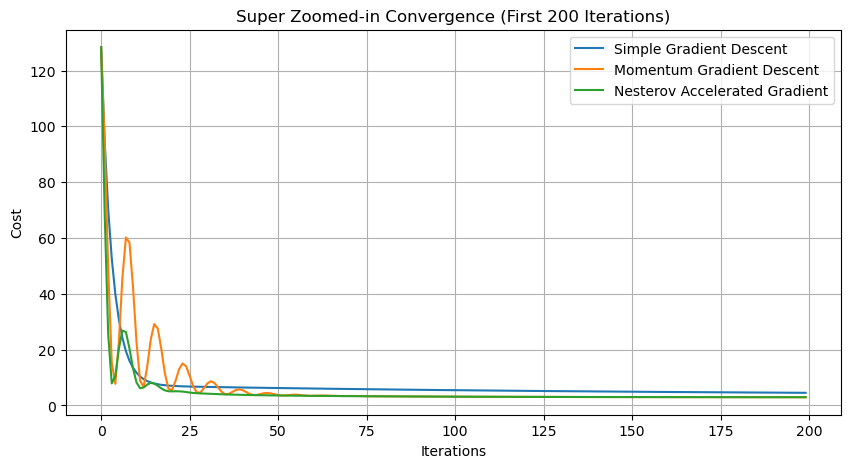

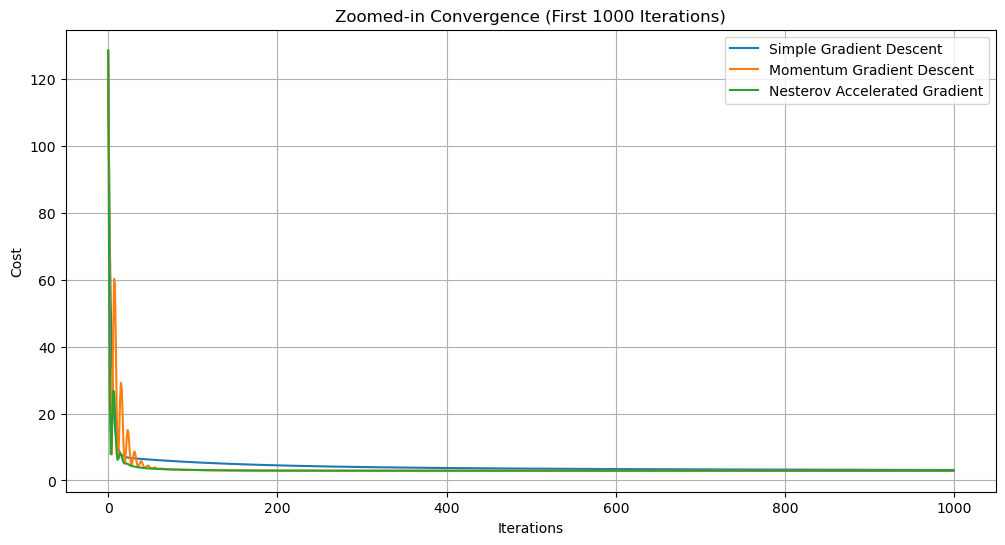

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cost_history_simple[:200], label='Simple Gradient Descent')
plt.plot(cost_history_momentum[:200], label='Momentum Gradient Descent')
plt.plot(cost_history_nag[:200], label='Nesterov Accelerated Gradient')

plt.title('Super Zoomed-in Convergence (First 200 Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(cost_history_simple[:1000], label='Simple Gradient Descent')
plt.plot(cost_history_momentum[:1000], label='Momentum Gradient Descent')
plt.plot(cost_history_nag[:1000], label='Nesterov Accelerated Gradient')

plt.title('Zoomed-in Convergence (First 1000 Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Final Cost (Simple GD): {cost_history_simple[-1]}")
print(f"Final Cost (Momentum GD): {cost_history_momentum[-1]}")
print(f"Final Cost (Nesterov NAG): {cost_history_nag[-1]}")

fastest_algorithm = "Nesterov Accelerated Gradient"

print(f"\nBased on the plot and final cost values, the fastest converging algorithm is likely: {fastest_algorithm}")

Final Cost (Simple GD): 2.9146971334530667
Final Cost (Momentum GD): 2.9146971334530662
Final Cost (Nesterov NAG): 2.9146971334530662

Based on the plot and final cost values, the fastest converging algorithm is likely: Nesterov Accelerated Gradient
